<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [2]:
# insert code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics


2024-10-15 19:57:30.763509: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
!pip install scikit-learn pandas numpy matplotlib seaborn


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [5]:
# insert code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes


In [6]:
# Load the diabetes dataset
diabetes_data = load_diabetes()

df_diabetes = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)

# Add the target variable (diabetes progression)
df_diabetes['target'] = diabetes_data.target

#first few rows of the DataFrame
print(df_diabetes.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


### Prepare input data

In [7]:
# insert code here
# Separate features and target variable
X = df_diabetes.drop(columns='target')  # Features
y = df_diabetes['target']  # Target variable (diabetes progression)


### Split the data (training/test)

In [8]:
# insert code here
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (353, 10)
Testing Features Shape: (89, 10)
Training Target Shape: (353,)
Testing Target Shape: (89,)


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifying the scaling
print("Scaled Training Features Shape:", X_train_scaled.shape)
print("Scaled Testing Features Shape:", X_test_scaled.shape)


Scaled Training Features Shape: (353, 10)
Scaled Testing Features Shape: (89, 10)


### Create the model's architecture

In [11]:
# insert code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [12]:
# Initialize the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))  # No activation function or linear activation for regression

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [13]:
# insert code here
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Appropriate loss function for regression
              metrics=['mae'])  # Mean Absolute Error as a metric


### Fit the training data

In [14]:
%%time 9.24s
# insert code here
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)  # Adjust epochs and batch size as needed


Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 31458.5098 - mae: 158.5578 - val_loss: 22362.6836 - val_mae: 133.7178
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 31218.9355 - mae: 157.8321 - val_loss: 22170.1152 - val_mae: 133.0337
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 30967.2598 - mae: 157.0758 - val_loss: 21966.4199 - val_mae: 132.3104
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 30690.2227 - mae: 156.2434 - val_loss: 21737.5684 - val_mae: 131.4973
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 30364.2402 - mae: 155.2748 - val_loss: 21466.6465 - val_mae: 130.5397
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 29976.7656 - mae: 154.1033 - val_loss: 21138.9199 - val_mae: 129.3764
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 29491.2012 - mae: 152.6877 - val_loss: 20752.9023 - val_mae: 128.0009
Epoch 8/10

### Create predictions

In [15]:
# insert code here
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Display the first few predictions
print("Predictions:")
print(predictions[:5])


3/3 [==============================] - 0s 6ms/step
Predictions:
[[165.31815]
 [190.85788]
 [142.50053]
 [326.32498]
 [ 83.93914]]


In [16]:
# Create a DataFrame to compare predictions with true values
results_df = pd.DataFrame({'True Values': y_test, 'Predictions': predictions.flatten()})

# Display first few rows of the comparison DataFrame
print(results_df.head())


     True Values  Predictions
287        219.0   165.318146
211         70.0   190.857880
72         202.0   142.500534
321        230.0   326.324982
73         111.0    83.939140


### Evaluate the model

In [17]:
# insert code here
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate predictions on the test set
predictions = model.predict(X_test_scaled)

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared (R²): {r2}")


3/3 [==============================] - 0s 5ms/step
Mean Absolute Error (MAE): 43.57538193263365
Mean Squared Error (MSE): 2963.454175130898
R-squared (R²): 0.4406626469389787


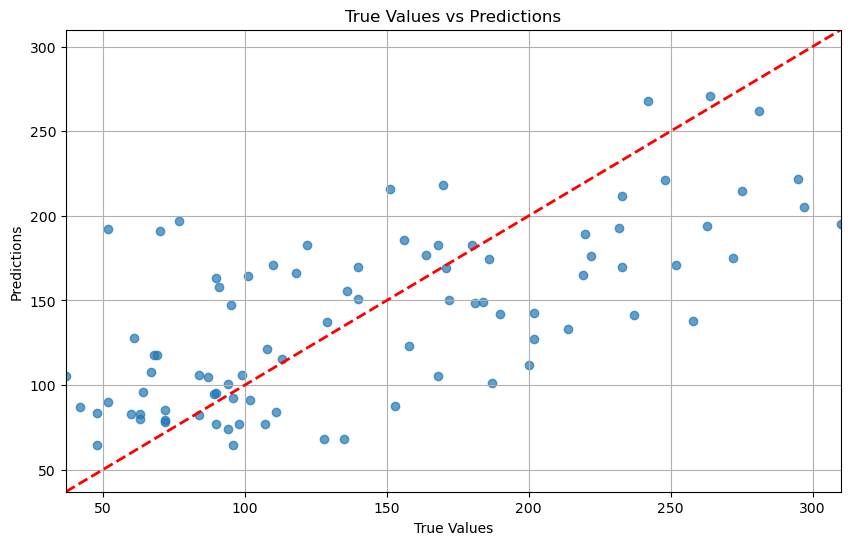

In [19]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of identity
plt.title('True Values vs Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()


### Visualisation of cost

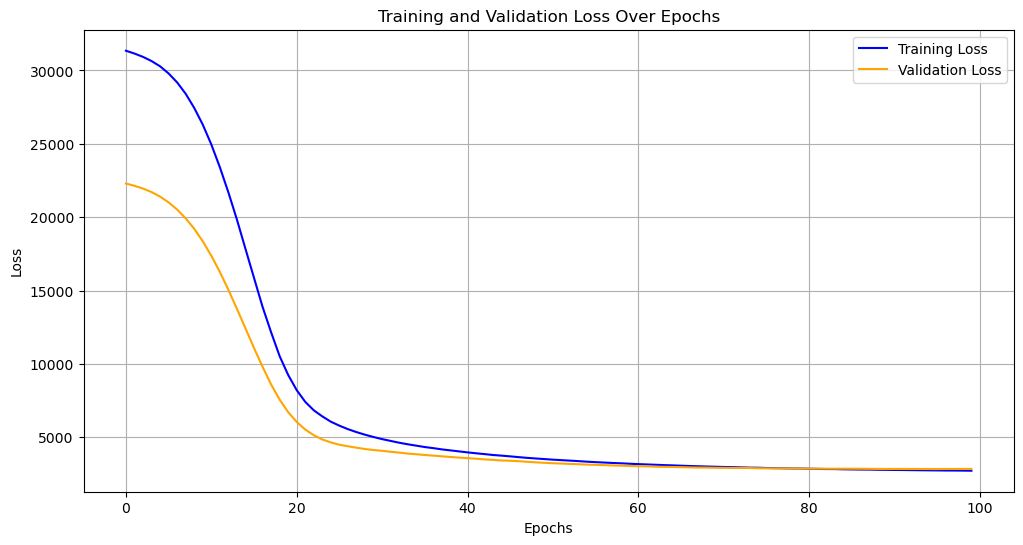

In [21]:
# Visualize the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


### Visualisation of residuals

Epoch 1/100
9/9 [==============================] - 1s 19ms/step - loss: 31547.8906 - mae: 158.7194 - val_loss: 22424.3301 - val_mae: 133.8592
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 31346.7129 - mae: 158.1320 - val_loss: 22279.5078 - val_mae: 133.3596
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 31152.0703 - mae: 157.5678 - val_loss: 22131.7285 - val_mae: 132.8485
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 30947.8906 - mae: 156.9661 - val_loss: 21965.8711 - val_mae: 132.2801
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 30697.5293 - mae: 156.2513 - val_loss: 21774.5781 - val_mae: 131.6255
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 30401.6914 - mae: 155.4036 - val_loss: 21542.9531 - val_mae: 130.8311
Epoch 7/100
9/9 [==============================] - 0s 15ms/step - loss: 30039.1445 - mae: 154.3616 - val_loss: 21258.5801 - val_mae: 129.8564
Epoch 8/100

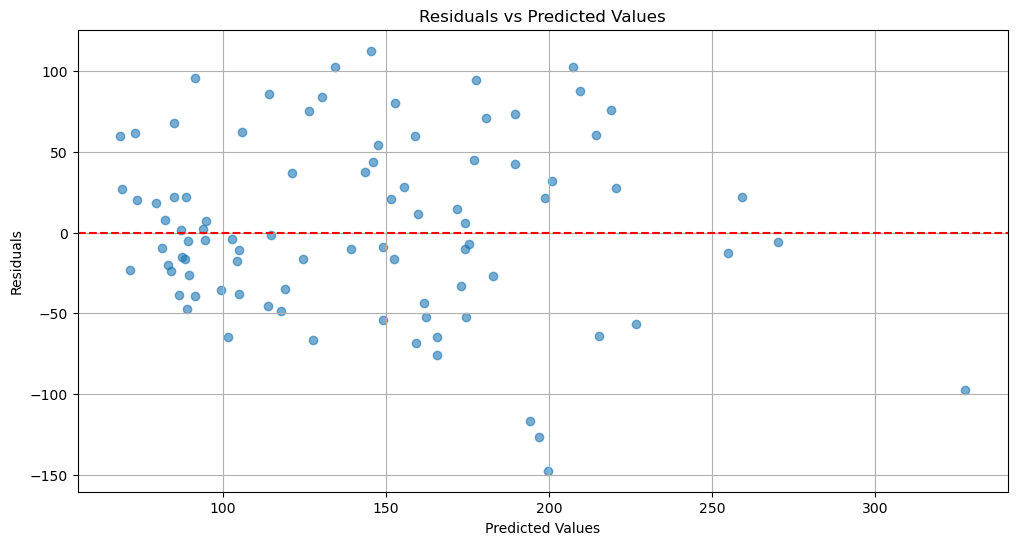

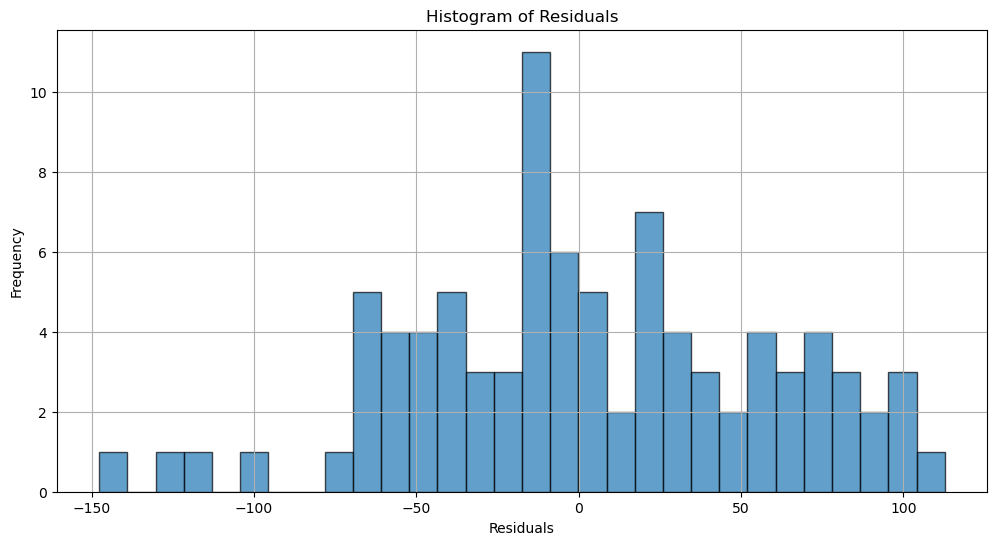

In [23]:
# insert code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the diabetes dataset
diabetes_data = load_diabetes()
X = diabetes_data.data
y = diabetes_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Calculate predictions
predictions = model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - predictions.flatten()

# Residuals vs Predicted Values Plot
plt.figure(figsize=(12, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



